<a href="https://colab.research.google.com/github/luongdiem2005/movie-ratings-analysis/blob/main/notebook/p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

First 10 lines after merging: 
   userId  movieId  rating            timestamp  year
0       1        1     4.0  2000-07-30 18:45:03  1995
1       1        3     4.0  2000-07-30 18:20:47  1995
2       1        6     4.0  2000-07-30 18:37:04  1995
3       1       47     5.0  2000-07-30 19:03:35  1995
4       1       50     5.0  2000-07-30 18:48:51  1995
5       1       70     3.0  2000-07-30 18:40:00  1996
6       1      101     5.0  2000-07-30 18:14:28  1996
7       1      110     4.0  2000-07-30 18:36:16  1995
8       1      151     5.0  2000-07-30 19:07:21  1995
9       1      157     5.0  2000-07-30 19:08:20  1995

Average rating by year (First 10 lines): 
year
1902    3.50000
1903    2.50000
1908    4.00000
1915    2.00000
1916    3.60000
1917    4.50000
1919    2.00000
1920    3.81250
1921    4.10000
1922    3.53125
Name: rating, dtype: float64

Average rating by year (Last 10 lines): 
year
2009    3.568966
2010    3.569096
2011    3.460764
2012    3.512

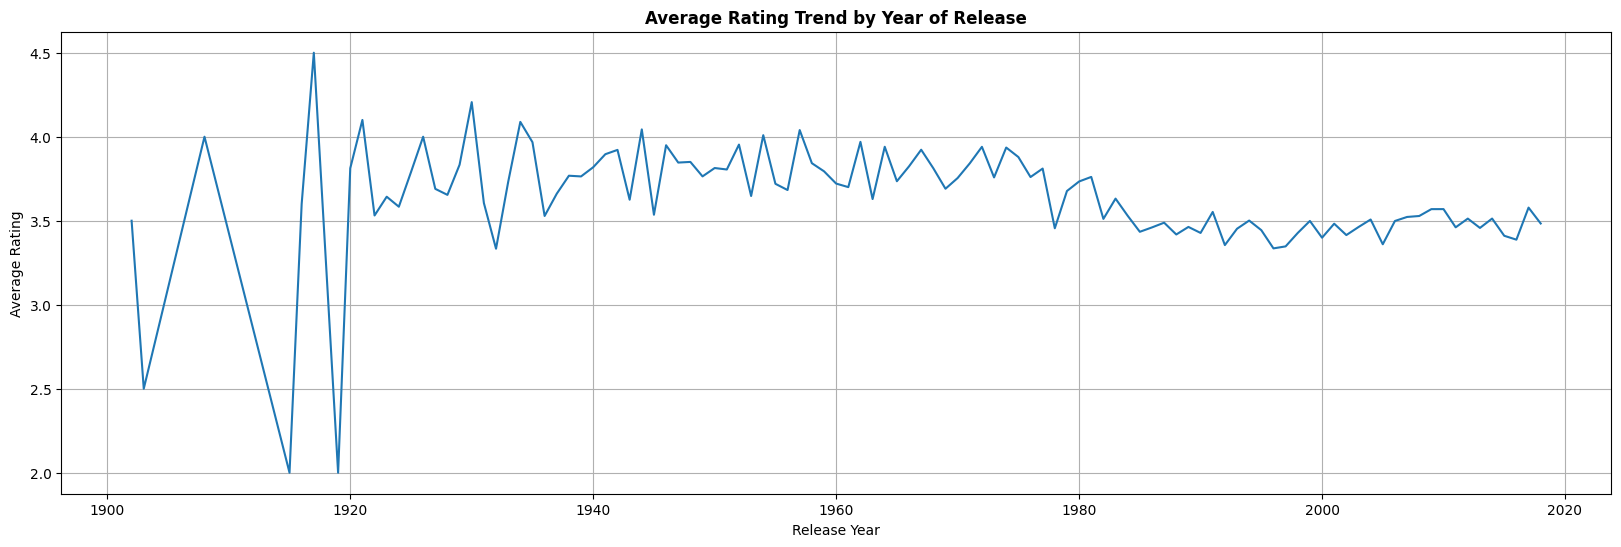


Number of ratings by year (First 10 lines): 
year
1902     5
1903     2
1908     1
1915     1
1916     5
1917     1
1919     1
1920     8
1921     5
1922    16
Name: rating, dtype: int64
Number of ratings by year (Last 10 lines): 
year
2009    1856
2010    1715
2011    1440
2012    1386
2013    1201
2014    1320
2015    1088
2016     785
2017     461
2018      91
Name: rating, dtype: int64


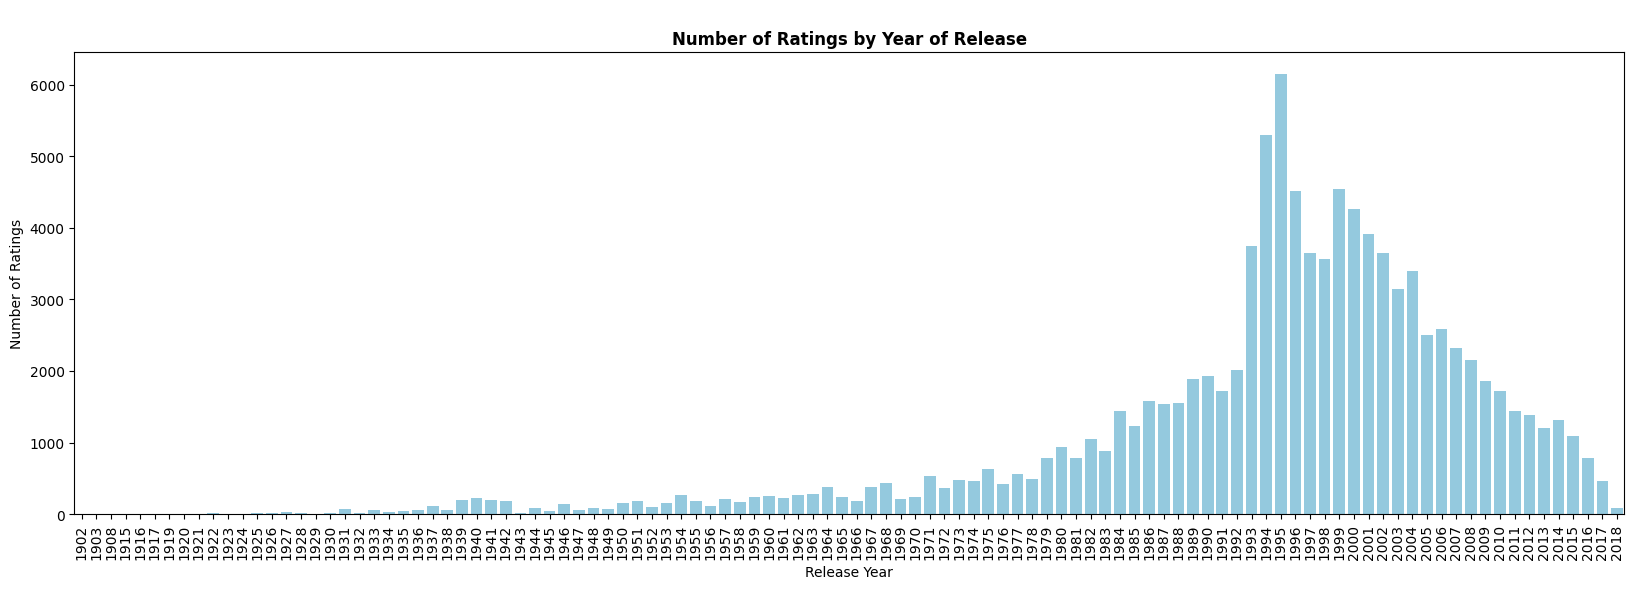


Top 5 years with the most ratings: 
year
1995    6144
1994    5296
1999    4536
1996    4509
2000    4268
Name: rating, dtype: int64


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
base = "/content/drive/MyDrive/projects/movie-ratings-analysis"
movies = pd.read_csv(f"{base}/data/clean_movies.csv")
movies['year'] = movies['year'].astype('Int64')
ratings = pd.read_csv(f"{base}/data/clean_ratings.csv")

# Merging movies and ratings
df = ratings.merge(movies[['movieId', 'year']], on='movieId')
print("\nFirst 10 lines after merging: ")
print(df.head(10))

# Average rating by year
yearly_ratings = df.groupby('year')['rating'].mean().dropna()
print("\nAverage rating by year (First 10 lines): ")
print(yearly_ratings.head(10))
print("\nAverage rating by year (Last 10 lines): ")
print(yearly_ratings.tail(10))
plt.figure(figsize=(20,6))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values)
plt.title("Average Rating Trend by Year of Release", fontweight="bold")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

# Number of ratings by year
yearly_ratings_counts = df.groupby('year')['rating'].count()
print("\nNumber of ratings by year (First 10 lines): ")
print(yearly_ratings_counts.head(10))
print("Number of ratings by year (Last 10 lines): ")
print(yearly_ratings_counts.tail(10))
plt.figure(figsize=(20,6))
sns.barplot(x=yearly_ratings_counts.index, y=yearly_ratings_counts.values, color="skyblue")
plt.title("\nNumber of Ratings by Year of Release", fontweight="bold")
plt.xlabel("Release Year")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()

# Top years with the most ratings
top_year = yearly_ratings_counts.sort_values(ascending=False).head()
print("\nTop 5 years with the most ratings: ")
print(top_year)